In [29]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
cleaned_flight = pd.read_csv("cleaned_flight.csv")

In [3]:
cleaned_flight

,Airline name,Travel Time,Number of Stoppage(s),Ticket price(Dollar),Departure Airport,Departure Time,1st Stoppage Waiting Time,1st Stoppage,2nd Stoppage Waiting Time,2nd Stoppage,3rd Stoppage Waiting time,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date
0,Emirates,51:15:00,2,1156.0,DAC,01:40:00,11h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,18:55:00,04-08
1,Emirates,57:25:00,2,1156.0,DAC,19:30:00,17h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,18:55:00,04-09
2,Turkish,26:5:00,1,1175.0,DAC,06:35:00,6h 20m,IST,NaN,NaN,NaN,NaN,EWR,22:40:00,04-09
3,Kuwait,21:15:00,1,1264.0,DAC,03:10:00,2h 10m,KWI,NaN,NaN,NaN,NaN,JFK,14:25:00,04-09
4,Etihad,22:35:00,1,1283.0,DAC,20:55:00,3h 0m,AUH,NaN,NaN,NaN,NaN,JFK,09:30:00,04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,British,47:35:00,2,2654.0,DAC,10:50:00,11h 35m,DOH,NaN,NaN,NaN,NaN,DXB,08:25:00,04-09
2457,Multiple,19:15:00,2,3307.0,DAC,00:50:00,1h 50m,CAN,NaN,NaN,NaN,NaN,DXB,18:05:00,04-09
2458,Multiple,23:30:00,2,3606.0,DAC,00:50:00,4h 0m,CAN,NaN,NaN,NaN,NaN,DXB,22:20:00,04-09
2459,Multiple,23:30:00,2,3606.0,DAC,00:50:00,3h 10m,CAN,NaN,NaN,NaN,NaN,DXB,22:20:00,04-09


In [4]:
cleaned_flight[['Airline name ', 'Departure Airport', '1st Stoppage', '2nd Stoppage', '3rd Stoppage', 'Destination Airport']] = cleaned_flight[['Airline name ', 'Departure Airport', '1st Stoppage', '2nd Stoppage', '3rd Stoppage', 'Destination Airport']].astype('string')

In [5]:
cleaned_flight.dtypes

Airline name                  string
Travel Time                   object
Number of Stoppage(s)          int64
Ticket price(Dollar)         float64
Departure Airport             string
Departure Time                object
1st Stoppage Waiting Time     object
1st Stoppage                  string
2nd Stoppage Waiting Time     object
2nd Stoppage                  string
3rd Stoppage Waiting time     object
3rd Stoppage                  string
Destination Airport           string
Arrival Time                  object
Arrival Date                  object
dtype: object

----------------------------------------------------------------------------------------------------------------------

In [6]:
#ANALYSIS 1: average price of tickets for different destinations - involves columns: Destination Airport, Ticket Price(Dollar)
cleaned_flight['Destination Airport'].unique()

<StringArray>
['JFK', 'EWR', 'LGA', 'IST', 'ORD', 'DFW', 'DEL', 'BKK', 'CDG', 'ORY', 'LAS',
 'BOM', 'DXB', 'DMK', 'MLE', 'LHR', 'LGW', 'STN', 'LCY', 'SHJ']
Length: 20, dtype: string

In [7]:
cleaned_flight['Departure Airport'].unique()

<StringArray>
['DAC', 'STN', 'JFK', 'LGA', 'EWR', 'LHR', 'LGW', 'LCY', 'DXB', 'SHJ', 'BOM']
Length: 11, dtype: string

In [8]:
#av price of tickets by destination
av_price = cleaned_flight.groupby(by = ['Departure Airport', 'Destination Airport']).mean()
av_price

Number of Stoppage(s)  \
Departure Airport Destination Airport                          
BOM               BKK                               1.222222   
                  DMK                               1.000000   
                  DXB                               2.000000   
                  LHR                               2.000000   
                  MLE                               1.379310   
DAC               DXB                               1.184615   
                  EWR                               1.736842   
                  JFK                               1.654930   
                  LAS                               2.021127   
                  LGA                               2.000000   
                  SHJ                               1.000000   
DXB               BKK                               1.039326   
                  DFW                               1.000000   
                  DMK                               1.000000   
                  MLE                               1.000000   
EWR               BKK                               1.812500   
                  BOM                               1.423077   
                  CDG                               1.000000   
                  DFW                               1.008065   
                  DXB                               1.089552   
                  ORY                               1.000000   
JFK               BKK                               1.207317   
                  BOM                               1.337423   
                  CDG                               1.000000   
                  DFW                               1.016949   
                  DXB                               1.139860   
                  ORY                               1.000000   
LCY               EWR                               1.454545   
                  JFK                               1.000000   
                  LGA                               1.000000   
LGA               BKK                               2.000000   
                  BOM                               2.000000   
                  CDG                               1.000000   
                  DFW                               1.000000   
                  DXB                               1.450000   
LGW               EWR                               1.068966   
                  JFK                               1.000000   
                  LGA                               1.125000   
LHR               EWR                               1.037037   
                  JFK                               1.019231   
                  LGA                               1.088235   
SHJ               BKK                               1.000000   
STN               BKK                               1.000000   
                  DEL                               1.000000   
                  DFW                               2.241935   
                  EWR                               1.000000   
                  IST                               1.000000   
                  JFK                               1.000000   
                  LAS                               2.000000   
                  LCY                               1.266667   
                  LGA                               2.000000   
                  LGW                               1.326087   
                  LHR                               1.110429   
                  ORD                               2.000000   
                  STN                               1.000000   

                                       Ticket price(Dollar)  
Departure Airport Destination Airport                        
BOM               BKK                            712.666667  
                  DMK                            297.000000  
                  DXB                           3116.000000  
                  LHR                           3166.000000  
                  

In [9]:
av_price['Number of Stoppage(s)'] = np.floor(av_price['Number of Stoppage(s)'])
av_price['Ticket price(Dollar)'] = av_price['Ticket price(Dollar)'].round(2)

In [10]:
av_price

Number of Stoppage(s)  \
Departure Airport Destination Airport                          
BOM               BKK                                    1.0   
                  DMK                                    1.0   
                  DXB                                    2.0   
                  LHR                                    2.0   
                  MLE                                    1.0   
DAC               DXB                                    1.0   
                  EWR                                    1.0   
                  JFK                                    1.0   
                  LAS                                    2.0   
                  LGA                                    2.0   
                  SHJ                                    1.0   
DXB               BKK                                    1.0   
                  DFW                                    1.0   
                  DMK                                    1.0   
                  MLE                                    1.0   
EWR               BKK                                    1.0   
                  BOM                                    1.0   
                  CDG                                    1.0   
                  DFW                                    1.0   
                  DXB                                    1.0   
                  ORY                                    1.0   
JFK               BKK                                    1.0   
                  BOM                                    1.0   
                  CDG                                    1.0   
                  DFW                                    1.0   
                  DXB                                    1.0   
                  ORY                                    1.0   
LCY               EWR                                    1.0   
                  JFK                                    1.0   
                  LGA                                    1.0   
LGA               BKK                                    2.0   
                  BOM                                    2.0   
                  CDG                                    1.0   
                  DFW                                    1.0   
                  DXB                                    1.0   
LGW               EWR                                    1.0   
                  JFK                                    1.0   
                  LGA                                    1.0   
LHR               EWR                                    1.0   
                  JFK                                    1.0   
                  LGA                                    1.0   
SHJ               BKK                                    1.0   
STN               BKK                                    1.0   
                  DEL                                    1.0   
                  DFW                                    2.0   
                  EWR                                    1.0   
                  IST                                    1.0   
                  JFK                                    1.0   
                  LAS                                    2.0   
                  LCY                                    1.0   
                  LGA                                    2.0   
                  LGW                                    1.0   
                  LHR                                    1.0   
                  ORD                                    2.0   
                  STN                                    1.0   

                                       Ticket price(Dollar)  
Departure Airport Destination Airport                        
BOM               BKK                                712.67  
                  DMK                                297.00  
                  DXB                               3116.00  
                  LHR                               3166.00  
                  

----------------------------------------------------------------------------------------------------------------------

In [11]:
#ANALYSIS 2: distribution of the ticket prices
cleaned_flight['Ticket price(Dollar)'].describe().round(2)

count    2461.00
mean     1316.54
std       884.80
min       135.00
25%       771.00
50%      1128.00
75%      1603.00
max      7867.00
Name: Ticket price(Dollar), dtype: float64

----------------------------------------------------------------------------------------------------------------------

we need to first find the distance between each flight and create a new column with the distance

In [12]:
distances = {
    ('BOM', 'BKK'): 3032,
    ('BOM', 'DMK'): 3010,
    ('BOM', 'DXB'): 1925,
    ('BOM', 'LHR'): 7221,
    ('BOM', 'MLE'): 1659,
    ('DAC', 'DXB'): 4038,
    ('DAC', 'EWR'): 12656,
    ('DAC', 'JFK'): 12652,
    ('DAC', 'LAS'): 12808,
    ('DAC', 'LGA'): 12640,
    ('DAC', 'SHJ'): 3520,
    ('DXB', 'BKK'): 4900,
    ('DXB', 'DFW'): 12911,
    ('DXB', 'DMK'): 4876,
    ('DXB', 'MLE'): 3039,
    ('EWR', 'BKK'): 13962,
    ('EWR', 'BOM'): 12545,
    ('EWR', 'CDG'): 5872,
    ('EWR', 'DFW'): 2205,
    ('EWR', 'DXB'): 11041,
    ('EWR', 'ORY'): 5871,
    ('JFK', 'BKK'): 13964,
    ('EWR', 'BOM'): 12551,
    ('EWR', 'CDG'): 5849,
    ('EWR', 'DFW'): 2239,
    ('EWR', 'DXB'): 11022,
    ('EWR', 'ORY'): 5848,
    ('LCY', 'EWR'): 5609,
    ('LCY', 'JFK'): 5587,
    ('LCY', 'LGA'): 5584,
    ('LGA', 'BKK'): 13950,
    ('LGA', 'BOM'): 12543,
    ('LGA', 'BKK'): 13950,
    ('LGA', 'BOM'): 12543,
    ('LGA', 'CDG'): 5847,
    ('LGA', 'DFW'): 2235,
    ('LGA', 'DXB'): 11017,
    ('LGW', 'EWR'): 5606,
    ('LGW', 'JFK'): 5584,
    ('LGW', 'LGA'): 5581,
    ('LHR', 'EWR'): 5577,
    ('LHR', 'JFK'): 5555,
    ('LHR', 'LGA'): 5551,
    ('SHJ', 'BKK'): 9589,
    ('STN', 'BKK'): 9529,
    ('STN', 'DEL'): 6689,
    ('STN', 'DFW'): 7667,
    ('STN', 'EWR'): 5608,
    ('STN', 'IST'): 2461,
    ('STN', 'JFK'): 5586,
    ('STN', 'LAS'): 8422,
    ('STN', 'LCY'): 44,
    ('STN', 'LGA'): 5583,
    ('STN', 'LGW'): 87,
    ('STN', 'LHR'): 67,
    ('STN', 'ORD'): 6382,
    ('STN', 'STN'): 0,

}

In [13]:
def get_distance(row):
    departure = row['Departure Airport']
    destination = row['Destination Airport']
    return distances.get((departure, destination))

cleaned_flight['Distance'] = cleaned_flight.apply(get_distance, axis=1)

In [14]:
cleaned_flight.head()

,Airline name,Travel Time,Number of Stoppage(s),Ticket price(Dollar),Departure Airport,Departure Time,1st Stoppage Waiting Time,1st Stoppage,2nd Stoppage Waiting Time,2nd Stoppage,3rd Stoppage Waiting time,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date,Distance
0,Emirates,51:15:00,2,1156.0,DAC,01:40:00,11h 15m,DXB,19h 40m,MXP,NaN,<NA>,JFK,18:55:00,04-08,12652.0
1,Emirates,57:25:00,2,1156.0,DAC,19:30:00,17h 15m,DXB,19h 40m,MXP,NaN,<NA>,JFK,18:55:00,04-09,12652.0
2,Turkish,26:5:00,1,1175.0,DAC,06:35:00,6h 20m,IST,NaN,<NA>,NaN,<NA>,EWR,22:40:00,04-09,12656.0
3,Kuwait,21:15:00,1,1264.0,DAC,03:10:00,2h 10m,KWI,NaN,<NA>,NaN,<NA>,JFK,14:25:00,04-09,12652.0
4,Etihad,22:35:00,1,1283.0,DAC,20:55:00,3h 0m,AUH,NaN,<NA>,NaN,<NA>,JFK,09:30:00,04-08,12652.0


In [15]:
#ANALYSIS: correlation between distance and airprice
reg1 = cleaned_flight['Distance'].corr(cleaned_flight['Ticket price(Dollar)'])
reg1

0.376045355652319

In [16]:
reg1** 2

0.1414101095076791

----------------------------------------------------------------------------------------------------------------------

<BarContainer object of 2461 artists>

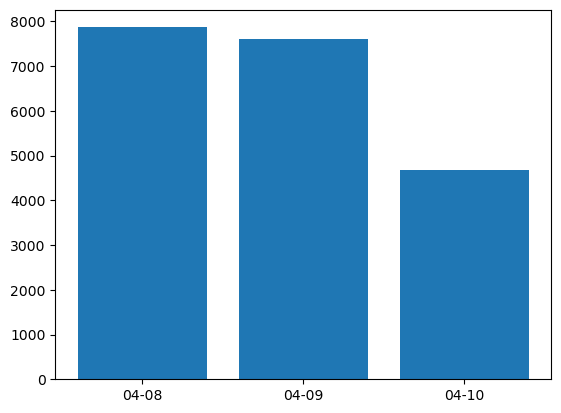

In [28]:
#ANALYSIS 3
#plot the prices of the airfares by the three days in Apr
plt.bar(cleaned_flight['Arrival Date'], cleaned_flight['Ticket price(Dollar)'])

----------------------------------------------------------------------------------------------------------------------

In [32]:
#ANALYSIS 4: statistical difference between price and arrival date
stats.ttest_ind('04-08', '04-09', equal_var = True)

TypeError: cannot perform reduce with flexible type

In [35]:
apr_08 = cleaned_flight[cleaned_flight['Arrival Date'] == '04-08']['Ticket price(Dollar)']
apr_08

0       1156.0
4       1283.0
6       1313.0
9       1431.0
10      1435.0
         ...  
2442    1326.0
2443    1326.0
2444    1368.0
2445    1561.0
2452    2290.0
Name: Ticket price(Dollar), Length: 1717, dtype: float64

In [36]:
apr_09 = cleaned_flight[cleaned_flight['Arrival Date'] == '04-09']['Ticket price(Dollar)']

In [37]:
apr_10 = cleaned_flight[cleaned_flight['Arrival Date'] == '04-10']['Ticket price(Dollar)']

In [40]:
#difference between apr 8 and 9
stats.ttest_ind(apr_08, apr_09, equal_var = True)

Ttest_indResult(statistic=-4.292476252368838, pvalue=1.8363341628329003e-05)

In [41]:
#difference btw apr 8 and 10
stats.ttest_ind(apr_08, apr_10, equal_var = True)

Ttest_indResult(statistic=-0.7929559674018744, pvalue=0.42791102800130565)

In [42]:
#difference btw apr 9 and 10
stats.ttest_ind(apr_09, apr_10, equal_var = True)

Ttest_indResult(statistic=0.31747093333992626, pvalue=0.7509756052676417)

In [ ]:
#analysis 5: statistical significance between destinations - for the sake of this experiment we will just be making
#use of flights to BKK airport (make ref to av_price table)


----------------------------------------------------------------------------------------------------------------------

# Archived

In [17]:
#ANALYSIS 3: Finding the variability of prices within specific time periods (months), any fluctuations
#extracting the month out
cleaned_flight['Month'] = cleaned_flight['Arrival Date'].str[:2]

In [18]:
cleaned_flight

,Airline name,Travel Time,Number of Stoppage(s),Ticket price(Dollar),Departure Airport,Departure Time,1st Stoppage Waiting Time,1st Stoppage,2nd Stoppage Waiting Time,2nd Stoppage,3rd Stoppage Waiting time,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date,Distance,Month
0,Emirates,51:15:00,2,1156.0,DAC,01:40:00,11h 15m,DXB,19h 40m,MXP,NaN,<NA>,JFK,18:55:00,04-08,12652.0,04
1,Emirates,57:25:00,2,1156.0,DAC,19:30:00,17h 15m,DXB,19h 40m,MXP,NaN,<NA>,JFK,18:55:00,04-09,12652.0,04
2,Turkish,26:5:00,1,1175.0,DAC,06:35:00,6h 20m,IST,NaN,<NA>,NaN,<NA>,EWR,22:40:00,04-09,12656.0,04
3,Kuwait,21:15:00,1,1264.0,DAC,03:10:00,2h 10m,KWI,NaN,<NA>,NaN,<NA>,JFK,14:25:00,04-09,12652.0,04
4,Etihad,22:35:00,1,1283.0,DAC,20:55:00,3h 0m,AUH,NaN,<NA>,NaN,<NA>,JFK,09:30:00,04-08,12652.0,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,British,47:35:00,2,2654.0,DAC,10:50:00,11h 35m,DOH,NaN,<NA>,NaN,<NA>,DXB,08:25:00,04-09,4038.0,04
2457,Multiple,19:15:00,2,3307.0,DAC,00:50:00,1h 50m,CAN,NaN,<NA>,NaN,<NA>,DXB,18:05:00,04-09,4038.0,04
2458,Multiple,23:30:00,2,3606.0,DAC,00:50:00,4h 0m,CAN,NaN,<NA>,NaN,<NA>,DXB,22:20:00,04-09,4038.0,04
2459,Multiple,23:30:00,2,3606.0,DAC,00:50:00,3h 10m,CAN,NaN,<NA>,NaN,<NA>,DXB,22:20:00,04-09,4038.0,04
